<a href="https://colab.research.google.com/github/Pugianf/ANTAQ/blob/main/Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing librarys needed and loading rendered data visualisation from google.colab.data_table

!pip install yfinance
!pip install tabulate
!pip install unidecode

import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate
import statistics
import math

%load_ext google.colab.data_table

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 7.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 235 kB 4.2 MB/s 


In [15]:
# getting values for the tickets

tickers_ibov = 'BBAS3.SA SANB11.SA BBDC4.SA ITUB4.SA BRSR6.SA'

In [130]:
# making a base with NaN values - there's a chance of better treating the missed values

baseNaN = yf.download(tickers = tickers_ibov, period = '10y')['Adj Close']

print(baseNaN.to_string())
print(baseNaN.describe())
print(type(baseNaN))

[*********************100%***********************]  5 of 5 completed
             BBAS3.SA   BBDC4.SA   BRSR6.SA   ITUB4.SA  SANB11.SA
Date                                                             
2012-03-09  14.997519   9.465115  11.066751  11.653911   9.770624
2012-03-12  15.060168   9.401180  11.103530  11.468884   9.676628
2012-03-13  15.456897   9.561013  11.250669  11.602342   9.843740
2012-03-14  15.138460   9.546485  11.460863  11.647840   9.864624
2012-03-15  14.929657   9.595886  11.502902  11.669074   9.702736
2012-03-16  15.075819   9.619140  11.613255  11.708508   9.848956
2012-03-19  15.002744   9.529053  11.508158  11.708508   9.848956
2012-03-20  14.960981   9.395374  11.266434  11.502245   9.556517
2012-03-21  14.694751   9.415710  11.255922  11.435505   9.321521
2012-03-22  14.219718   9.415710  11.255922  11.117013   9.321521
2012-03-23  14.105351   9.517431  10.620083  11.010855   9.034301
2012-03-26  14.458909   9.610415  10.846043  11.204989   9.185744
2012-03

In [131]:
#  getting infos on dataframe trying to change the format of datatimeindex in pandas

baseNaN.index = baseNaN.index.strftime('%d/%m/%Y')

baseNaN.index

# solution - must to convert from DataTimeIndex to string first, and then change the format

Index(['09/03/2012', '12/03/2012', '13/03/2012', '14/03/2012', '15/03/2012',
       '16/03/2012', '19/03/2012', '20/03/2012', '21/03/2012', '22/03/2012',
       ...
       '22/02/2022', '23/02/2022', '24/02/2022', '25/02/2022', '02/03/2022',
       '03/03/2022', '04/03/2022', '07/03/2022', '08/03/2022', '09/03/2022'],
      dtype='object', name='Date', length=2481)

In [132]:
# printing tables with google.colab.data_table

baseNaN

BBAS3.SA   BBDC4.SA   BRSR6.SA   ITUB4.SA  SANB11.SA
Date                                                             
09/03/2012  14.997519   9.465115  11.066751  11.653911   9.770624
12/03/2012  15.060168   9.401180  11.103530  11.468884   9.676628
13/03/2012  15.456897   9.561013  11.250669  11.602342   9.843740
14/03/2012  15.138460   9.546485  11.460863  11.647840   9.864624
15/03/2012  14.929657   9.595886  11.502902  11.669074   9.702736
...               ...        ...        ...        ...        ...
03/03/2022  34.770000  20.510000  10.190000  25.049999  31.139999
04/03/2022  33.900002  19.920000  10.250000  24.670000  30.320000
07/03/2022  32.450001  19.410000   9.750000  24.139999  29.590000
08/03/2022  32.790001  19.799999  10.180000  24.110001  29.719999
09/03/2022  34.330002  20.930000  10.640000  25.200001  32.090000

[2481 rows x 5 columns]

In [133]:
# making a base without NaN values, simple by deleting rows with NaN

base = baseNaN.dropna()

base.describe()
base

# base to string works for showing the whole dataframe, but it not needed anymore with %load_ext google.colab.data_table

BBAS3.SA   BBDC4.SA   BRSR6.SA   ITUB4.SA  SANB11.SA
Date                                                             
09/03/2012  14.997519   9.465115  11.066751  11.653911   9.770624
12/03/2012  15.060168   9.401180  11.103530  11.468884   9.676628
13/03/2012  15.456897   9.561013  11.250669  11.602342   9.843740
14/03/2012  15.138460   9.546485  11.460863  11.647840   9.864624
15/03/2012  14.929657   9.595886  11.502902  11.669074   9.702736
...               ...        ...        ...        ...        ...
03/03/2022  34.770000  20.510000  10.190000  25.049999  31.139999
04/03/2022  33.900002  19.920000  10.250000  24.670000  30.320000
07/03/2022  32.450001  19.410000   9.750000  24.139999  29.590000
08/03/2022  32.790001  19.799999  10.180000  24.110001  29.719999
09/03/2022  34.330002  20.930000  10.640000  25.200001  32.090000

[2480 rows x 5 columns]

In [134]:
# making the ratio dataframe with the tickets

lista = list(base.columns)

ratio10a = pd.DataFrame()

for i in lista:
  for j in lista:
    if lista.index(j) <= lista.index(i):
      continue
    else:
      ratio10a[i + '/' + j] = base[i] / base[j]

ratio10a

BBAS3.SA/BBDC4.SA  BBAS3.SA/BRSR6.SA  BBAS3.SA/ITUB4.SA  \
Date                                                                  
09/03/2012           1.584505           1.355187           1.286909   
12/03/2012           1.601944           1.356341           1.313133   
13/03/2012           1.616659           1.373865           1.332222   
14/03/2012           1.585763           1.320883           1.299680   
15/03/2012           1.555839           1.297904           1.279421   
...                       ...                ...                ...   
03/03/2022           1.695271           3.412169           1.388024   
04/03/2022           1.701807           3.307317           1.374139   
07/03/2022           1.671819           3.328205           1.344242   
08/03/2022           1.656061           3.221022           1.360017   
09/03/2022           1.640229           3.226504           1.362302   

            BBAS3.SA/SANB11.SA  BBDC4.SA/BRSR6.SA  BBDC4.SA/ITUB4.SA  \
Date                                                                   
09/03/2012            1.534960           0.855275           0.812184   
12/03/2012            1.556345           0.846684           0.819712   
13/03/2012            1.570226           0.849817           0.824059   
14/03/2012            1.534621           0.832964           0.819593   
15/03/2012            1.538706           0.834214           0.822335   
...                        ...                ...                ...   
03/03/2022            1.116570           2.012758           0.818763   
04/03/2022            1.118074           1.943415           0.807458   
07/03/2022            1.096654           1.990769           0.804060   
08/03/2022            1.103297           1.944990           0.821236   
09/03/2022            1.069804           1.967105           0.830556   

            BBDC4.SA/SANB11.SA  BRSR6.SA/ITUB4.SA  BRSR6.SA/SANB11.SA  \
Date                                                                    
09/03/2012            0.968732           0.949617            1.132655   
12/03/2012            0.971535           0.968144            1.147459   
13/03/2012            0.971279           0.969689            1.142926   
14/03/2012            0.967749           0.983948            1.161814   
15/03/2012            0.988988           0.985760            1.185532   
...                        ...                ...                 ...   
03/03/2022            0.658638           0.406786            0.327232   
04/03/2022            0.656992           0.415484            0.338061   
07/03/2022            0.655965           0.403894            0.329503   
08/03/2022            0.666218           0.422231            0.342530   
09/03/2022            0.652228           0.422222            0.331567   

            ITUB4.SA/SANB11.SA  
Date                            
09/03/2012            1.192750  
12/03/2012            1.185215  
13/03/2012            1.178652  
14/03/2012            1.180769  
15/03/2012            1.202658  
...                        ...  
03/03/2022            0.804432  
04/03/2022            0.813654  
07/03/2022            0.815816  
08/03/2022            0.811238  
09/03/2022            0.785291  

[2480 rows x 10 columns]

In [135]:
# getting the lenght of dataframe and dividing in bins of 10 years with the mean of quotation

bins10a = pd.DataFrame()

for i in ratio10a.columns:
  listaBins = []
  x = int(len(ratio10a.index)/10)
  for z in range (0,10):
    value = ratio10a[i][z*x:(z + 1)*x].mean()
    listaBins.append(value)
  bins10a[i] = listaBins

bins10a

BBAS3.SA/BBDC4.SA  BBAS3.SA/BRSR6.SA  BBAS3.SA/ITUB4.SA  \
0           1.306413           1.401000           1.281230   
1           1.440921           1.763451           1.325480   
2           1.371249           2.173056           1.194148   
3           1.271170           2.778555           1.007103   
4           1.253497           2.283497           1.025196   
5           1.371473           2.224564           1.097112   
6           1.390292           2.021630           1.064889   
7           1.492016           2.193895           1.298070   
8           1.518424           2.449251           1.168162   
9           1.349319           2.651058           1.135142   

   BBAS3.SA/SANB11.SA  BBDC4.SA/BRSR6.SA  BBDC4.SA/ITUB4.SA  \
0            1.548396           1.079441           0.983756   
1            1.839538           1.222246           0.921662   
2            1.822916           1.587067           0.871483   
3            1.330934           2.192859           0.791649   
4            1.056961           1.843304           0.821098   
5            1.137706           1.624906           0.800755   
6            0.973805           1.456517           0.764242   
7            1.113328           1.469964           0.869973   
8            1.017812           1.620490           0.771059   
9            0.854895           1.965452           0.840353   

   BBDC4.SA/SANB11.SA  BRSR6.SA/ITUB4.SA  BRSR6.SA/SANB11.SA  \
0            1.188838           0.917552            1.104210   
1            1.278651           0.763559            1.056339   
2            1.333607           0.552296            0.846759   
3            1.045175           0.369285            0.491754   
4            0.856121           0.452174            0.465588   
5            0.830491           0.495163            0.513760   
6            0.699873           0.526047            0.481649   
7            0.745936           0.594317            0.509715   
8            0.669372           0.478758            0.418980   
9            0.633368           0.428177            0.322655   

   ITUB4.SA/SANB11.SA  
0            1.207642  
1            1.390307  
2            1.529701  
3            1.313364  
4            1.039902  
5            1.036627  
6            0.917902  
7            0.858154  
8            0.869555  
9            0.755372

In [101]:
len(ratio7a)

1736

In [103]:
# dividing in bins of 7 years with the mean of quotation

# where dataframe starts with 7 years

start = int(len(base.index)/10) * 3

# defining dataframe of 7 years

ratio7a = ratio10a[start:]

# dividing ratio dataframe 7 years into 10 bins - value

x = math.floor(len(ratio7a)/10)

# creating 10 bins

bins7a = pd.DataFrame()

for i in ratio10a.columns:
  listaBins = []
  for z in range (0,10):
    value = ratio7a[i][z*x:(z + 1)*x].mean()
    listaBins.append(value)
  bins7a[i] = listaBins

bins7a

BBAS3.SA/BBDC4.SA  BBAS3.SA/BRSR6.SA  BBAS3.SA/ITUB4.SA  \
0           1.287209           2.675406           1.056318   
1           1.168323           2.617440           0.919007   
2           1.369210           2.267669           1.096844   
3           1.358213           2.184908           1.095818   
4           1.339947           2.072405           1.013316   
5           1.448830           2.069276           1.186070   
6           1.485255           2.179639           1.277651   
7           1.556933           2.385908           1.219970   
8           1.367475           2.525854           1.097628   
9           1.388329           2.705975           1.165175   

   BBAS3.SA/SANB11.SA  BBDC4.SA/BRSR6.SA  BBDC4.SA/ITUB4.SA  \
0            1.447686           2.080626           0.820066   
1            1.072986           2.233828           0.791194   
2            1.061911           1.668072           0.803369   
3            1.152446           1.608797           0.807163   
4            0.986516           1.548292           0.756416   
5            1.024849           1.431065           0.816902   
6            1.102853           1.467886           0.860127   
7            1.129585           1.536059           0.785466   
8            0.840372           1.859711           0.806291   
9            0.873035           1.947994           0.837268   

   BBDC4.SA/SANB11.SA  BRSR6.SA/ITUB4.SA  BRSR6.SA/SANB11.SA  \
0            1.125093           0.400509            0.552217   
1            0.920445           0.360352            0.418444   
2            0.783263           0.486223            0.471543   
3            0.848730           0.503574            0.529591   
4            0.735744           0.491336            0.477208   
5            0.706359           0.573116            0.495379   
6            0.742243           0.587492            0.507404   
7            0.727232           0.511307            0.474089   
8            0.616130           0.434856            0.332795   
9            0.628172           0.430567            0.322979   

   ITUB4.SA/SANB11.SA  
0            1.368691  
1            1.165475  
2            0.972857  
3            1.051100  
4            0.972263  
5            0.867174  
6            0.863537  
7            0.928386  
8            0.764796  
9            0.752633

In [104]:
# dividing in bins of 5 years with the mean of quotation

# where dataframe starts with 5 years

start = int(len(base.index)/2)

# defining dataframe of 7 years

ratio5a = ratio10a[start:]

# dividing ratio dataframe 7 years into 10 bins - value

x = math.floor(len(ratio5a)/10)

# creating 10 bins

bins5a = pd.DataFrame()

for i in ratio5a.columns:
  listaBins = []
  for z in range (0,10):
    value = ratio5a[i][z*x:(z + 1)*x].mean()
    listaBins.append(value)
  bins5a[i] = listaBins

bins5a

BBAS3.SA/BBDC4.SA  BBAS3.SA/BRSR6.SA  BBAS3.SA/ITUB4.SA  \
0           1.400794           2.157618           1.111510   
1           1.342151           2.291511           1.082715   
2           1.340321           1.964445           0.993386   
3           1.440263           2.078816           1.136392   
4           1.492627           2.098321           1.318915   
5           1.491405           2.289468           1.277226   
6           1.546078           2.335214           1.180303   
7           1.490771           2.563288           1.156022   
8           1.234833           2.451568           1.022233   
9           1.463879           2.850644           1.248116   

   BBAS3.SA/SANB11.SA  BBDC4.SA/BRSR6.SA  BBDC4.SA/ITUB4.SA  \
0            1.153470           1.541908           0.794527   
1            1.121942           1.707905           0.806983   
2            0.952523           1.466709           0.740917   
3            0.995087           1.446324           0.787566   
4            1.134414           1.405903           0.883725   
5            1.092243           1.534025           0.856221   
6            1.120802           1.515566           0.765963   
7            0.914823           1.725414           0.776155   
8            0.781821           1.985954           0.828345   
9            0.927861           1.944921           0.852362   

   BBDC4.SA/SANB11.SA  BRSR6.SA/ITUB4.SA  BRSR6.SA/SANB11.SA  \
0            0.825386           0.516183            0.536044   
1            0.835596           0.474143            0.491475   
2            0.709675           0.506070            0.484850   
3            0.690070           0.546023            0.478447   
4            0.759948           0.629004            0.540982   
5            0.731925           0.559629            0.478447   
6            0.726995           0.505668            0.480337   
7            0.611748           0.451848            0.357622   
8            0.633450           0.417058            0.318991   
9            0.633191           0.439302            0.326275   

   ITUB4.SA/SANB11.SA  
0            1.038506  
1            1.034748  
2            0.957908  
3            0.877896  
4            0.860920  
5            0.855389  
6            0.950261  
7            0.788849  
8            0.765047  
9            0.745581

In [121]:
bins10a = Creating10Bins(ratio10a, 10)

In [123]:
bins7a = Creating10Bins(ratio10a, 7)

In [124]:
bins7a

BBAS3.SA/BBDC4.SA  BBAS3.SA/BRSR6.SA  BBAS3.SA/ITUB4.SA  \
0           1.287209           2.675406           1.056318   
1           1.168323           2.617440           0.919007   
2           1.369210           2.267669           1.096844   
3           1.358213           2.184908           1.095818   
4           1.339947           2.072405           1.013316   
5           1.448830           2.069276           1.186070   
6           1.485255           2.179639           1.277651   
7           1.556933           2.385908           1.219970   
8           1.367475           2.525854           1.097628   
9           1.388329           2.705975           1.165175   

   BBAS3.SA/SANB11.SA  BBDC4.SA/BRSR6.SA  BBDC4.SA/ITUB4.SA  \
0            1.447686           2.080626           0.820066   
1            1.072986           2.233828           0.791194   
2            1.061911           1.668072           0.803369   
3            1.152446           1.608797           0.807163   
4            0.986516           1.548292           0.756416   
5            1.024849           1.431065           0.816902   
6            1.102853           1.467886           0.860127   
7            1.129585           1.536059           0.785466   
8            0.840372           1.859711           0.806291   
9            0.873035           1.947994           0.837268   

   BBDC4.SA/SANB11.SA  BRSR6.SA/ITUB4.SA  BRSR6.SA/SANB11.SA  \
0            1.125093           0.400509            0.552217   
1            0.920445           0.360352            0.418444   
2            0.783263           0.486223            0.471543   
3            0.848730           0.503574            0.529591   
4            0.735744           0.491336            0.477208   
5            0.706359           0.573116            0.495379   
6            0.742243           0.587492            0.507404   
7            0.727232           0.511307            0.474089   
8            0.616130           0.434856            0.332795   
9            0.628172           0.430567            0.322979   

   ITUB4.SA/SANB11.SA  
0            1.368691  
1            1.165475  
2            0.972857  
3            1.051100  
4            0.972263  
5            0.867174  
6            0.863537  
7            0.928386  
8            0.764796  
9            0.752633

In [125]:
ratio7a = ratio10a[248*3:]

In [126]:
ratio7a

BBAS3.SA/BBDC4.SA  BBAS3.SA/BRSR6.SA  BBAS3.SA/ITUB4.SA  \
Date                                                                  
13/03/2015           1.195357           2.003550           1.015639   
16/03/2015           1.177861           2.012338           1.015639   
17/03/2015           1.190682           2.042377           1.037228   
18/03/2015           1.226636           2.098121           1.078158   
19/03/2015           1.192068           2.144195           1.036530   
...                       ...                ...                ...   
03/03/2022           1.695271           3.412169           1.388024   
04/03/2022           1.701807           3.307317           1.374139   
07/03/2022           1.671819           3.328205           1.344242   
08/03/2022           1.656061           3.221022           1.360017   
09/03/2022           1.649450           3.238498           1.370282   

            BBAS3.SA/SANB11.SA  BBDC4.SA/BRSR6.SA  BBDC4.SA/ITUB4.SA  \
Date                                                                   
13/03/2015            1.632980           1.676110           0.849653   
16/03/2015            1.637850           1.708468           0.862274   
17/03/2015            1.654021           1.715300           0.871121   
18/03/2015            1.698127           1.710468           0.878955   
19/03/2015            1.642868           1.798718           0.869523   
...                        ...                ...                ...   
03/03/2022            1.116570           2.012758           0.818763   
04/03/2022            1.118074           1.943415           0.807458   
07/03/2022            1.096654           1.990769           0.804060   
08/03/2022            1.103297           1.944990           0.821236   
09/03/2022            1.056355           1.963380           0.830751   

            BBDC4.SA/SANB11.SA  BRSR6.SA/ITUB4.SA  BRSR6.SA/SANB11.SA  \
Date                                                                    
13/03/2015            1.366102           0.506920            0.815043   
16/03/2015            1.390529           0.504706            0.813904   
17/03/2015            1.389137           0.507854            0.809851   
18/03/2015            1.384377           0.513868            0.809356   
19/03/2015            1.378166           0.483412            0.766194   
...                        ...                ...                 ...   
03/03/2022            0.658638           0.406786            0.327232   
04/03/2022            0.656992           0.415484            0.338061   
07/03/2022            0.655965           0.403894            0.329503   
08/03/2022            0.666218           0.422231            0.342530   
09/03/2022            0.640429           0.423123            0.326187   

            ITUB4.SA/SANB11.SA  
Date                            
13/03/2015            1.607834  
16/03/2015            1.612630  
17/03/2015            1.594654  
18/03/2015            1.575026  
19/03/2015            1.584969  
...                        ...  
03/03/2022            0.804432  
04/03/2022            0.813654  
07/03/2022            0.815816  
08/03/2022            0.811238  
09/03/2022            0.770903  

[1736 rows x 10 columns]

In [129]:
start = int(len(base.index)/10)*5

# defining dataframe of 7 years

ratio5a = ratio10a[start:]

# dividing ratio dataframe 7 years into 10 bins - value

x = math.floor(len(ratio5a)/10)

# creating 10 bins

bins5a = pd.DataFrame()

for i in ratio5a.columns:
  listaBins = []
  for z in range (0,10):
    value = ratio5a[i][z*x:(z + 1)*x].mean()
    listaBins.append(value)
  bins5a[i] = listaBins

bins5a

BBAS3.SA/BBDC4.SA  BBAS3.SA/BRSR6.SA  BBAS3.SA/ITUB4.SA  \
0           1.400794           2.157618           1.111510   
1           1.342151           2.291511           1.082715   
2           1.340321           1.964445           0.993386   
3           1.440263           2.078816           1.136392   
4           1.492627           2.098321           1.318915   
5           1.491405           2.289468           1.277226   
6           1.546078           2.335214           1.180303   
7           1.490771           2.563288           1.156022   
8           1.234833           2.451568           1.022233   
9           1.463879           2.850644           1.248116   

   BBAS3.SA/SANB11.SA  BBDC4.SA/BRSR6.SA  BBDC4.SA/ITUB4.SA  \
0            1.153470           1.541908           0.794527   
1            1.121942           1.707905           0.806983   
2            0.952523           1.466709           0.740917   
3            0.995087           1.446324           0.787566   
4            1.134414           1.405903           0.883725   
5            1.092243           1.534025           0.856221   
6            1.120802           1.515566           0.765963   
7            0.914823           1.725414           0.776155   
8            0.781821           1.985954           0.828345   
9            0.927861           1.944921           0.852362   

   BBDC4.SA/SANB11.SA  BRSR6.SA/ITUB4.SA  BRSR6.SA/SANB11.SA  \
0            0.825386           0.516183            0.536044   
1            0.835596           0.474143            0.491475   
2            0.709675           0.506070            0.484850   
3            0.690070           0.546023            0.478447   
4            0.759948           0.629004            0.540982   
5            0.731925           0.559629            0.478447   
6            0.726995           0.505668            0.480337   
7            0.611748           0.451848            0.357622   
8            0.633450           0.417058            0.318991   
9            0.633191           0.439302            0.326275   

   ITUB4.SA/SANB11.SA  
0            1.038506  
1            1.034748  
2            0.957908  
3            0.877896  
4            0.860920  
5            0.855389  
6            0.950261  
7            0.788849  
8            0.765047  
9            0.745581

In [128]:
bins5a = Creating10Bins(ratio10a, 5)

bins5a

BBAS3.SA/BBDC4.SA  BBAS3.SA/BRSR6.SA  BBAS3.SA/ITUB4.SA  \
0           1.400794           2.157618           1.111510   
1           1.342151           2.291511           1.082715   
2           1.340321           1.964445           0.993386   
3           1.440263           2.078816           1.136392   
4           1.492627           2.098321           1.318915   
5           1.491405           2.289468           1.277226   
6           1.546078           2.335214           1.180303   
7           1.490771           2.563288           1.156022   
8           1.234833           2.451568           1.022233   
9           1.463879           2.850644           1.248116   

   BBAS3.SA/SANB11.SA  BBDC4.SA/BRSR6.SA  BBDC4.SA/ITUB4.SA  \
0            1.153470           1.541908           0.794527   
1            1.121942           1.707905           0.806983   
2            0.952523           1.466709           0.740917   
3            0.995087           1.446324           0.787566   
4            1.134414           1.405903           0.883725   
5            1.092243           1.534025           0.856221   
6            1.120802           1.515566           0.765963   
7            0.914823           1.725414           0.776155   
8            0.781821           1.985954           0.828345   
9            0.927861           1.944921           0.852362   

   BBDC4.SA/SANB11.SA  BRSR6.SA/ITUB4.SA  BRSR6.SA/SANB11.SA  \
0            0.825386           0.516183            0.536044   
1            0.835596           0.474143            0.491475   
2            0.709675           0.506070            0.484850   
3            0.690070           0.546023            0.478447   
4            0.759948           0.629004            0.540982   
5            0.731925           0.559629            0.478447   
6            0.726995           0.505668            0.480337   
7            0.611748           0.451848            0.357622   
8            0.633450           0.417058            0.318991   
9            0.633191           0.439302            0.326275   

   ITUB4.SA/SANB11.SA  
0            1.038506  
1            1.034748  
2            0.957908  
3            0.877896  
4            0.860920  
5            0.855389  
6            0.950261  
7            0.788849  
8            0.765047  
9            0.745581

In [117]:
p = int(len(ratio10a)/10)
p

248

In [118]:
dfBin = df[(p * 10):]

NameError: ignored

In [79]:
# getting the lenght of dataframe and dividing in bins

len(base.index)/ 5

496.0

In [77]:
# getting the lenght of dataframe and dividing in bins

bins = pd.DataFrame()

for i in ratio.columns:
  listaBins = []
  x = int(len(ratio.index)/10)
  for z in range (0,10):
    value = ratio['BBAS3.SA/BBDC4.SA'][z*x:(z + 1)*x].mean()
    listaBins.append(value)
  bins[i] = listaBins

In [74]:
for i in ratio.columns:
  bins[i] = 0

In [78]:
ratio[]

BBAS3.SA/BBDC4.SA  BBAS3.SA/BRSR6.SA  BBAS3.SA/ITUB4.SA  \
0           1.306413           1.306413           1.306413   
1           1.440921           1.440921           1.440921   
2           1.371249           1.371249           1.371249   
3           1.271170           1.271170           1.271170   
4           1.253497           1.253497           1.253497   
5           1.371473           1.371473           1.371473   
6           1.390292           1.390292           1.390292   
7           1.492016           1.492016           1.492016   
8           1.518424           1.518424           1.518424   
9           1.349356           1.349356           1.349356   

   BBAS3.SA/SANB11.SA  BBDC4.SA/BRSR6.SA  BBDC4.SA/ITUB4.SA  \
0            1.306413           1.306413           1.306413   
1            1.440921           1.440921           1.440921   
2            1.371249           1.371249           1.371249   
3            1.271170           1.271170           1.271170   
4            1.253497           1.253497           1.253497   
5            1.371473           1.371473           1.371473   
6            1.390292           1.390292           1.390292   
7            1.492016           1.492016           1.492016   
8            1.518424           1.518424           1.518424   
9            1.349356           1.349356           1.349356   

   BBDC4.SA/SANB11.SA  BRSR6.SA/ITUB4.SA  BRSR6.SA/SANB11.SA  \
0            1.306413           1.306413            1.306413   
1            1.440921           1.440921            1.440921   
2            1.371249           1.371249            1.371249   
3            1.271170           1.271170            1.271170   
4            1.253497           1.253497            1.253497   
5            1.371473           1.371473            1.371473   
6            1.390292           1.390292            1.390292   
7            1.492016           1.492016            1.492016   
8            1.518424           1.518424            1.518424   
9            1.349356           1.349356            1.349356   

   ITUB4.SA/SANB11.SA  
0            1.306413  
1            1.440921  
2            1.371249  
3            1.271170  
4            1.253497  
5            1.371473  
6            1.390292  
7            1.492016  
8            1.518424  
9            1.349356

In [69]:
listaBins = []
x = int(len(ratio.index)/10)
for i in range (0,10):
  value = ratio['BBAS3.SA/BBDC4.SA'][i*x:(i + 1)*x].mean()
  listaBins.append(value)

In [70]:
listaBins

[1.3064130023448495,
 1.4409207060350082,
 1.3712488767268536,
 1.2711700441994265,
 1.2534965582560866,
 1.3714725728729318,
 1.3902920073414853,
 1.4920159459799722,
 1.5184243207138752,
 1.3493561599962556]

AttributeError: ignored

In [60]:
ratio['BBAS3.SA/BBDC4.SA'][248*9:248*10].mean()

1.3493561599962556

In [87]:
import math

173

In [10]:
# making a dataframe with the variation from one day to another for the ratio

for a in ratio.columns:
  for b in ratio[a]:
    

SyntaxError: ignored

In [141]:
def Creating10Bins(df, t):
  p = int(len(df)/10)

  start = int(math.floor(p * (10 - t)))

  dfBin = df[start:]

  x = int(math.floor(len(dfBin)/10))

  bins = pd.DataFrame()

  for i in dfBin.columns:
    listaBins = []
    for z in range (0,10):
      value = dfBin[i][z*x:(z + 1)*x].mean()
      listaBins.append(value)
    bins[i] = listaBins
  
  return bins

In [218]:
periodos = [10, 7, 5, 3, 2, 1, 0.5, 5/12, 4/12, 3/12, 2/12, 1/12, 0.5/12]

bins = pd.DataFrame()

for i in periodos:
  xq = Creating10Bins(ratio10a.iloc[:, [0]], i)
  bins[str(i) + ' anos'] = list(xq.iloc[:, 0])

bins

10 anos    7 anos    5 anos    3 anos    2 anos    1 anos  0.5 anos  \
0  1.306413  1.287209  1.400794  1.491460  1.438535  1.223022  1.372689   
1  1.440921  1.168323  1.342151  1.494984  1.613893  1.210268  1.400901   
2  1.371249  1.369210  1.340321  1.468306  1.623896  1.234719  1.412813   
3  1.271170  1.358213  1.440263  1.476610  1.516452  1.242047  1.426676   
4  1.253497  1.339947  1.492627  1.614954  1.414415  1.257188  1.470006   
5  1.371473  1.448830  1.491405  1.554578  1.219631  1.360278  1.546357   
6  1.390292  1.485256  1.546078  1.351723  1.237326  1.424409  1.442777   
7  1.492016  1.556933  1.490771  1.228879  1.307888  1.490251  1.423759   
8  1.518424  1.367475  1.234833  1.349441  1.458756  1.447069  1.422314   
9  1.349319  1.388329  1.463805  1.490016  1.477521  1.493008  1.651867   

   0.4166666666666667 anos  0.3333333333333333 anos  0.25 anos  \
0                 1.440540                 1.429014   1.570612   
1                 1.392983                 1.456456   1.507476   
2                 1.423625                 1.546914   1.457050   
3                 1.488428                 1.536084   1.398614   
4                 1.554038                 1.455151   1.425137   
5                 1.474285                 1.404726   1.425538   
6                 1.405677                 1.429975   1.385747   
7                 1.423467                 1.388281   1.516372   
8                 1.461701                 1.575877   1.644375   
9                 1.665322                 1.682612   1.693432   

   0.16666666666666666 anos  0.08333333333333333 anos  \
0                  1.394197                  1.374136   
1                  1.416272                  1.499660   
2                  1.447214                  1.546514   
3                  1.412527                  1.615648   
4                  1.394404                  1.641687   
5                  1.406112                  1.648312   
6                  1.552662                  1.674043   
7                  1.632909                  1.709553   
8                  1.674620                  1.698539   
9                  1.699183                  1.663940   

   0.041666666666666664 anos  
0                   1.637502  
1                   1.659121  
2                   1.675494  
3                   1.672592  
4                   1.691271  
5                   1.727835  
6                   1.695271  
7                   1.701807  
8                   1.671819  
9                   1.656061

In [208]:
import seaborn as sns
from matplotlib.pyplot import *

In [222]:
bins = bins.reset_index()

[]

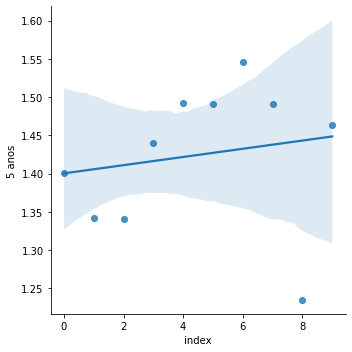

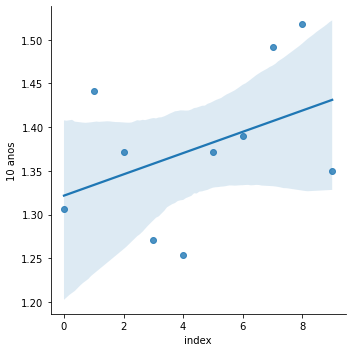

In [215]:
fig = sns.lmplot(data=bins, x='index', y='5 anos'), sns.lmplot(data=bins, x='index', y='10 anos')
plot()

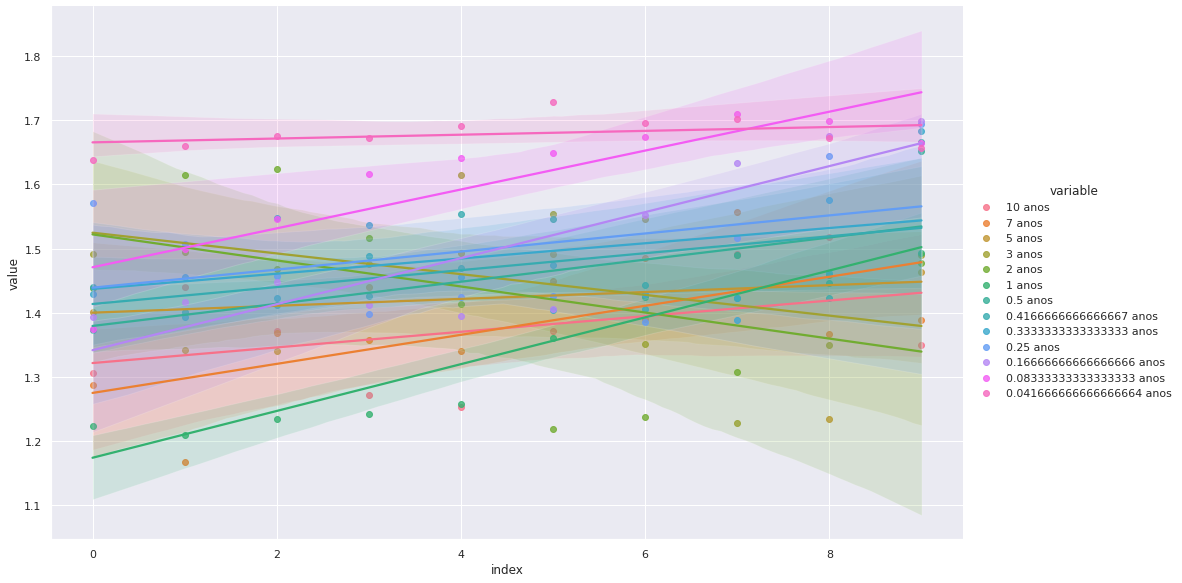

In [233]:
sns.lmplot(x='index', y='value', hue='variable', 
             data=pd.melt(bins, ['index']), height=8.27, aspect=15/9)

AttributeError: ignored

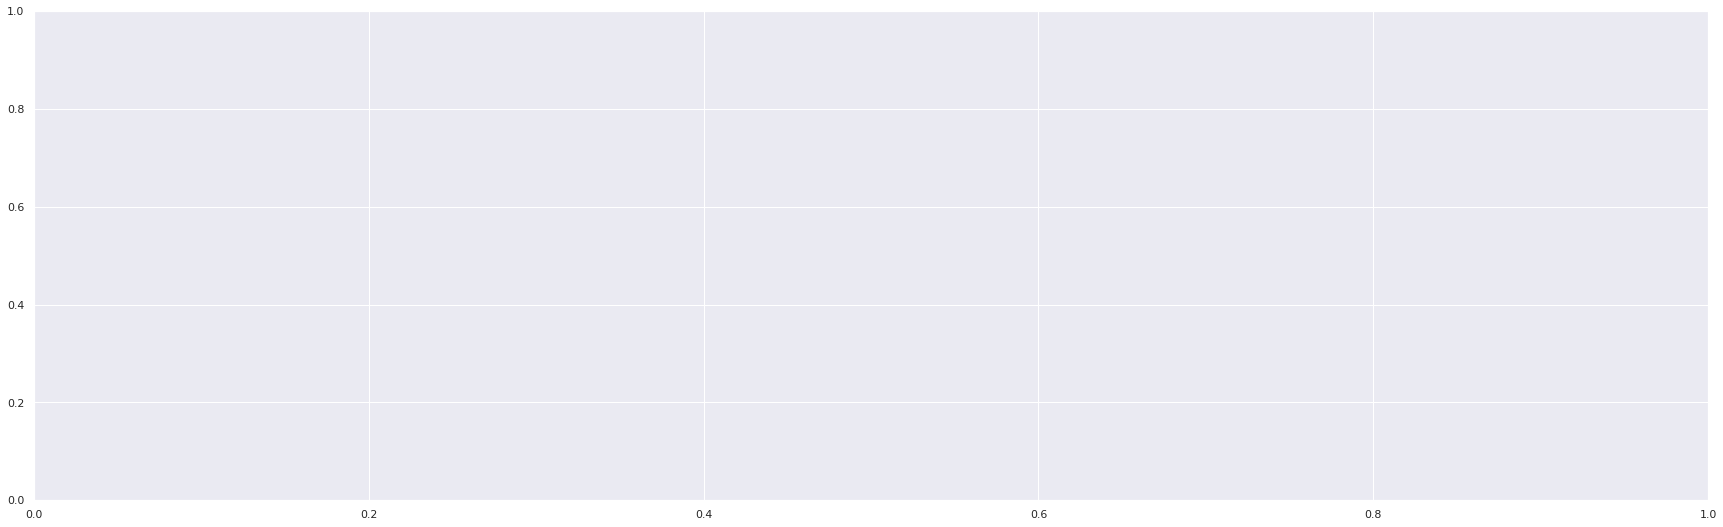

In [235]:
sns.lineplot(x='index', y='value', hue='variable', 
             data=pd.melt(bins, ['index']), height=8.27, aspect=15/9)

In [180]:
xq = Creating10Bins(ratio10a.iloc[:, [0]], 0.5/12)

xq.iloc[:,]

[1.6375021416508253,
 1.6591213312287418,
 1.6754940099256408,
 1.6725915021806963,
 1.6912712854946657,
 1.727834650875436,
 1.6952706031080949,
 1.701807298998058,
 1.6718187026295075,
 1.6560607161111818]

In [159]:
ratio10a.iloc[:, [0]]

BBAS3.SA/BBDC4.SA
Date                         
09/03/2012           1.584505
12/03/2012           1.601944
13/03/2012           1.616659
14/03/2012           1.585763
15/03/2012           1.555839
...                       ...
03/03/2022           1.695271
04/03/2022           1.701807
07/03/2022           1.671819
08/03/2022           1.656061
09/03/2022           1.640229

[2480 rows x 1 columns]

In [154]:
bins10a

BBAS3.SA/BBDC4.SA  BBAS3.SA/BRSR6.SA  BBAS3.SA/ITUB4.SA  \
0                NaN                NaN                NaN   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3                NaN                NaN                NaN   
4                NaN                NaN                NaN   
5                NaN                NaN                NaN   
6                NaN                NaN                NaN   
7                NaN                NaN                NaN   
8                NaN                NaN                NaN   
9                NaN                NaN                NaN   

   BBAS3.SA/SANB11.SA  BBDC4.SA/BRSR6.SA  BBDC4.SA/ITUB4.SA  \
0                 NaN                NaN                NaN   
1                 NaN                NaN                NaN   
2                 NaN                NaN                NaN   
3                 NaN                NaN                NaN   
4                 NaN                NaN                NaN   
5                 NaN                NaN                NaN   
6                 NaN                NaN                NaN   
7                 NaN                NaN                NaN   
8                 NaN                NaN                NaN   
9                 NaN                NaN                NaN   

   BBDC4.SA/SANB11.SA  BRSR6.SA/ITUB4.SA  BRSR6.SA/SANB11.SA  \
0                 NaN                NaN                 NaN   
1                 NaN                NaN                 NaN   
2                 NaN                NaN                 NaN   
3                 NaN                NaN                 NaN   
4                 NaN                NaN                 NaN   
5                 NaN                NaN                 NaN   
6                 NaN                NaN                 NaN   
7                 NaN                NaN                 NaN   
8                 NaN                NaN                 NaN   
9                 NaN                NaN                 NaN   

   ITUB4.SA/SANB11.SA  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
5                 NaN  
6                 NaN  
7                 NaN  
8                 NaN  
9                 NaN

In [145]:
  t = 1/12
  
  p = int(len(ratio10a)/10)

  start = int(math.floor(p * (10 - t)))

  start

2459

In [146]:
len(ratio10a)

2480